# Лабораторная работа 2 (Задача кластеризация)

### Цель:
Научится применять модели кластеризации библиотеки scikit-learn к набору эмпирических данных

### Дано:
excel-файл

### Результат:
Число кластеров, обученная модель

### Ход выполнения: 
1. Загрузить данные из файла (использовать библиотеку Pandas).
2. Визуализировать загруженные данные (диаграмма рассеяния).
3. Оценить число групп (кластеров).
4. Выбрать модель кластеризации.
5. Обучить модель кластеризации на обучающих данных.
6. Проверить качество полученной модели на тестовых данных.
7. Визуализировать результат.

Кластеризация – это разбиение множества объектов на подмножества (кластеры) по заданному критерию. Каждый кластер включает максимально схожие между собой объекты.

### Загрузка данных из файла, используя библиотку Pandas.

In [3]:
import pandas as pd
import numpy as np

df = pd.read_excel ('lab2-09.xlsx')
#y = pd.read_excel ('lab2-09.xlsx', usecols = 2)
#print (df)
for line in df:
    x = np.array (df[0]) 
    y = np.array (df[1])
    X = np.array (df)
print (X)


[[-2.82128961 -2.50690164]
 [-4.57731442  3.37697565]
 [-0.66845183 -5.9938906 ]
 ...
 [-4.0176929  -2.90256369]
 [-0.92089135 -5.33982131]
 [-6.65836733  2.1102505 ]]


### Визуализация загруженных данных (диаграмма рассеяния).

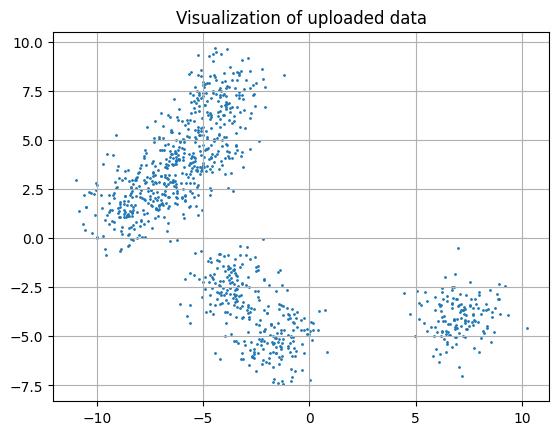

In [4]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots() #Возвращает 2 объекта. fix - Canva рисования. ax - Система координат.
ax.scatter (x, y, 1) #Отрисовка графика.(x и y - вектора). scatter - диаграмма рассеивания.
ax.grid()
plt.title ('Visualization of uploaded data')
plt.show ()

Text(0.5, 1.0, 'Visualization of uploaded data')

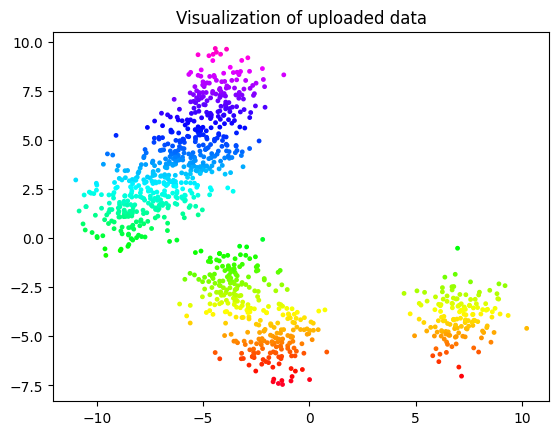

In [24]:
plt.scatter(X[:,0], X[:,1], 6, c=y, cmap='gist_rainbow')
plt.title ('Visualization of uploaded data')

### Оценка числа групп (кластеров).

#### Для оценки числа групп кластеров можно использовать следующие методы:
- Визуальный анализ дегндрограммы: по ней определяют разницу между уровнями объединения. Наибольшая разница по оси расстояний между соседними уровнями указывает на предпочтительное число классов (соответствующее уровню, от которого осуществляется переход к последующему).

- Метод «локтя»: заключается в построении графика зависимости суммы квадратов расстояний от точек до центроидов от числа кластеров и выборе точки «излома» на графике. На графике ищется точка, где дальнейшее увеличение числа кластеров приводит к незначительному уменьшению суммы квадратов расстояний.

- Анализ матрицы ядра: метод основан на разложении матрицы ядра по собственным значениям. Затем анализируют собственные значения и собственные векторы, чтобы получить меру компактности входного распределения. После этого строят график, угол которого указывает оптимальное количество кластеров в наборе данных.

- Статистика пробело: измеряет, насколько далека объединённая внутрикластерная сумма квадратов вокруг центров кластеров от суммы квадратов, ожидаемой при нулевом эталонном распределении данных. Ожидаемое значение оценивают путём моделирования нулевых эталонных данных характеристик исходных данных, но без каких-либо кластеров в них. Затем оптимальное количество кластеров оценивают как значение, для которого наблюдаемая сумма квадратов меньше всего падает ниже нулевого значения.

##### Выбор метода зависит от конкретных условий и задач анализа.

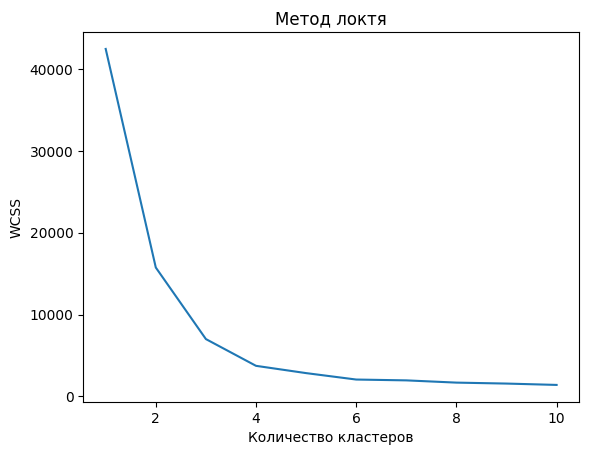

In [25]:
#Использование elbow method для поиска оптимального количества кластеров.
from sklearn.cluster import KMeans
#Within Clusters Sum of Squares (WCSS) - сумма квадратов внутри кластеров.

wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit (X)
    wcss.append (kmeans.inertia_)
plt.plot (range (1, 11), wcss)
plt.title ('Метод локтя')
plt.xlabel ('Количество кластеров')
plt.ylabel ('WCSS')
plt.show ()

### Обучение модели кластеризации на обучающих данных.

In [37]:
#С помощью метода к-средних (к-Means)
kmeans = KMeans (n_clusters = 3, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit (X)
print (y_kmeans)

KMeans(n_clusters=3, random_state=42)


### Проверка качества полученной модели на тестовых данных.

In [51]:
#Определение центров и меток
center = kmeans.cluster_centers_
new_labels = kmeans.labels_
print (center)
#print (new_labels)

[[-6.17050682  4.0386134 ]
 [-2.60706271 -3.80715624]
 [ 7.04810822 -3.99888742]]


### Визуализирование результата.

Text(0.5, 1.0, 'Предсказанные')

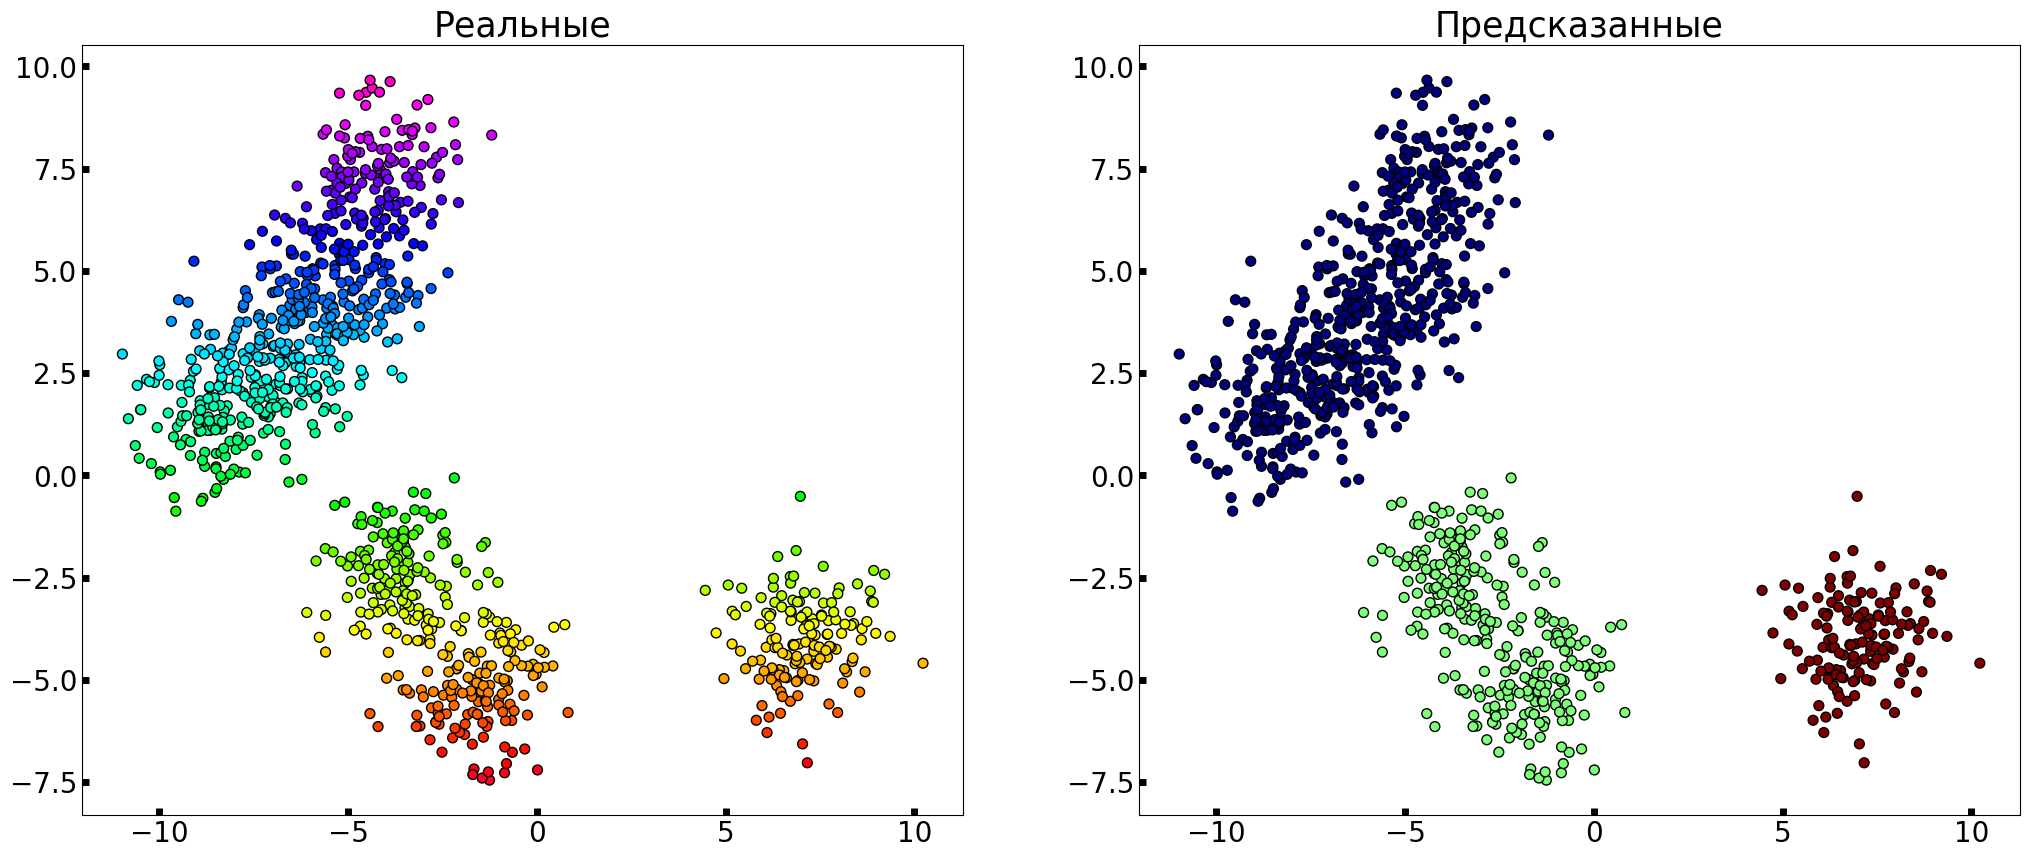

In [59]:

fig, axes = plt.subplots(1, 2, figsize=(25,10))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow', edgecolor='k', s=50)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet', edgecolor='k', s=50)
axes[0].tick_params(direction='in', length=5, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=5, width=5, colors='k', labelsize=20)
axes[0].set_title('Реальные', fontsize=25)
axes[1].set_title('Предсказанные', fontsize=25)
